<a href="https://colab.research.google.com/github/jeffersonramelo/Textual-Analysis/blob/main/sentimento_dicionario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Caminho do arquivo CSV
caminho_arquivo = "/content/dataset sentimento rotulados.csv"

# Ler o arquivo CSV
import pandas as pd
df = pd.read_csv(caminho_arquivo, sep=",", encoding='latin-1')


In [2]:
df.head()


,sentimento_rotulado,texto,id
0,neutral,"According to Gran , the company has no plans t...",1
1,neutral,Technopolis plans to develop in stages an area...,2
2,negative,The international electronic industry company ...,3
3,positive,With the new production plant the company woul...,4
4,positive,According to the company 's updated strategy f...,5


In [3]:
contagem_rotulos = df['sentimento_rotulado'].value_counts()
print(contagem_rotulos)

neutral     2879
positive    1363
negative     604
Name: sentimento_rotulado, dtype: int64


In [4]:
print(df.iloc[2])


sentimento_rotulado                                             negative
texto                  The international electronic industry company ...
id                                                                     3
Name: 2, dtype: object


Lei de Zipf(1949) correlação inversa entre frequencia das palavras e seu ranking. Segundo Pao (1978) palavras das extremidades devem ser eliminadas da análise, as mais frequentes são artigos, preposições e conjunções e as menos frequentes são palavras raras. Ambas não possui significado para análise de sentimento.

In [5]:
frequencia = df['texto'].value_counts()
print(frequencia)


TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sells stake in Morning Digital Design Oy Finnish IT company TJ Group Plc said on Friday 7 April that it had signed an agreement on selling its shares of Morning Digital Design Oy to Edita Oyj .                                                             2
SSH Communications Security Corporation is headquartered in Helsinki , Finland .                                                                                                                                                                                                                         2
The issuer is solely responsible for the content of this announcement .                                                                                                                                                                                                                                  2
The report profiles 614 companies including many key and niche players worldwide such as Black & Decker

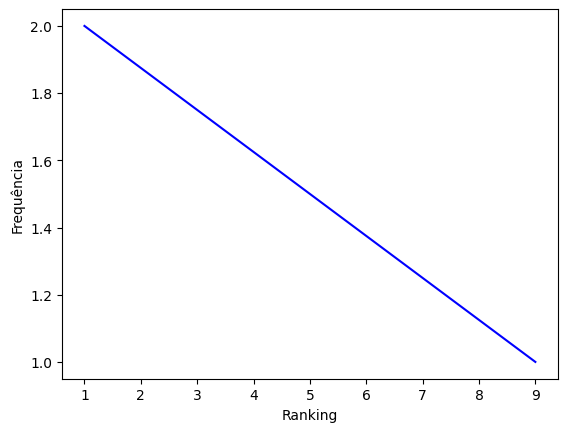

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

frequencia = df['texto'].value_counts()
ranking = frequencia.rank(method='min', ascending=False)

plt.plot(ranking, frequencia, 'b')
plt.xlabel("Ranking")
plt.ylabel("Frequência")
plt.show()


In [7]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
stopwords_en

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()
    
    # Remover números
    text = re.sub(r'\d+', '', text)
    
    # Remover sinais de pontuação e caracteres especiais
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remover stopwords
    stopwords_en = stopwords.words('english')
    text = ' '.join([word for word in text.split() if word not in stopwords_en])
    
    return text

df['texto'] = df['texto'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df.head()

,sentimento_rotulado,texto,id
0,neutral,according gran company plans move production r...,1
1,neutral,technopolis plans develop stages area less squ...,2
2,negative,international electronic industry company elco...,3
3,positive,new production plant company would increase ca...,4
4,positive,according company updated strategy years baswa...,5


In [11]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Criar uma instância do stemmer
stemmer = PorterStemmer()

# Função para realizar a stemização das palavras em um texto
def stem_text(text):
    # Tokenizar o texto em palavras
    words = word_tokenize(text)
    
    # Aplicar a stemização em cada palavra
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Juntar as palavras novamente em um texto
    stemmed_text = ' '.join(stemmed_words)
    
    return stemmed_text

# Aplicar a função de stemização na coluna "texto" do DataFrame
df['texto'] = df['texto'].apply(stem_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
df.head()

,sentimento_rotulado,texto,id
0,neutral,accord gran compani plan move product russia a...,1
1,neutral,technopoli plan develop stage area less squar ...,2
2,negative,intern electron industri compani elcoteq laid ...,3
3,positive,new product plant compani would increas capac ...,4
4,positive,accord compani updat strategi year baswar targ...,5


In [13]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from pandas import DataFrame

# Função para realizar a tokenização do texto
def tokenize_text(text):
    # Tokenizar o texto em palavras
    tokens = word_tokenize(text)
    
    return tokens

# Criar um novo DataFrame com as palavras tokenizadas
df_tokenized = DataFrame({'id': df['id'], 'tokenizado': df['texto'].apply(tokenize_text).explode()})

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
df_tokenized.head()

,id,tokenizado
0,1,accord
0,1,gran
0,1,compani
0,1,plan
0,1,move


In [15]:
# Caminho do arquivo CSV
caminho_arquivo = "/content/dicionario_LoughranMcdonals.csv"

# Ler o arquivo CSV
import pandas as pd
dicio = pd.read_csv(caminho_arquivo, sep=",")

In [16]:
dicio.head()

,word,sentiment
0,abandon,negative
1,abandoned,negative
2,abandoning,negative
3,abandonment,negative
4,abandonments,negative


In [17]:
contagem_rotulos = dicio['sentiment'].value_counts()
print(contagem_rotulos)

negative        2355
litigious        904
positive         354
uncertainty      297
constraining     184
superfluous       56
Name: sentiment, dtype: int64


In [18]:
import nltk
from nltk.stem import SnowballStemmer

# Inicializar o stemmer
stemmer = SnowballStemmer("english")

# Aplicar a stemização no dicionário
dicio['stemmed_word'] = dicio['word'].apply(lambda word: stemmer.stem(word))

In [19]:
dicio.head()

,word,sentiment,stemmed_word
0,abandon,negative,abandon
1,abandoned,negative,abandon
2,abandoning,negative,abandon
3,abandonment,negative,abandon
4,abandonments,negative,abandon


In [20]:
df_tokenized.head()

,id,tokenizado
0,1,accord
0,1,gran
0,1,compani
0,1,plan
0,1,move


In [21]:
merged_df = df_tokenized.merge(dicio, left_on='tokenizado', right_on='stemmed_word', how='left')


In [22]:
merged_df.head()

,id,tokenizado,word,sentiment,stemmed_word
0,1,accord,NaN,NaN,NaN
1,1,gran,NaN,NaN,NaN
2,1,compani,NaN,NaN,NaN
3,1,plan,NaN,NaN,NaN
4,1,move,NaN,NaN,NaN


In [23]:
merged_df = merged_df.dropna(subset=['sentiment'])

In [24]:
merged_df.head()

,id,tokenizado,word,sentiment,stemmed_word
37,3,contrari,contrary,negative,contrari
39,3,layoff,layoff,negative,layoff
40,3,layoff,layoffs,negative,layoff
42,3,contract,contraction,negative,contract
43,3,contract,contractions,negative,contract


In [25]:
sentiment_counts = merged_df.groupby(['id', 'sentiment']).size().reset_index(name='count')
sentiment_counts

,id,sentiment,count
0,3,litigious,5
1,3,negative,5
2,4,positive,9
3,5,positive,3
4,7,negative,2
...,...,...,...
3259,4842,negative,9
3260,4842,positive,3
3261,4844,positive,7
3262,4845,positive,3


In [26]:
# Agrupar e calcular a nova coluna "sentiment_id"
sentiment_id = sentiment_counts.groupby('id').agg(sentiment_id=('sentiment', lambda x: 'positive' if (x == 'positive').sum() > (x == 'negative').sum() and (x == 'positive').sum() > (x == 'neutral').sum() else 'negative' if (x == 'negative').sum() > (x == 'positive').sum() and (x == 'negative').sum() > (x == 'neutral').sum() else 'neutral' if (x == 'neutral').sum() > (x == 'positive').sum() and (x == 'neutral').sum() > (x == 'negative').sum() else 'neutral'))
sentiment_id

,sentiment_id
id,
3,negative
4,positive
5,positive
7,neutral
8,positive
...,...
4841,neutral
4842,neutral
4844,positive


In [27]:
contagem_sentimentos = sentiment_id['sentiment_id'].value_counts()
print(contagem_sentimentos)

positive    1006
negative     863
neutral      612
Name: sentiment_id, dtype: int64


Número de acertos do dicionário com a base de dados 

In [28]:
merged_df = df.merge(sentiment_id, on='id', how='inner')

In [ ]:
merged_df

In [29]:
num_acertos = (merged_df['sentimento_rotulado'] == merged_df['sentiment_id']).sum()

In [30]:
total_registros = len(merged_df)

In [31]:
percentual_acertos = (num_acertos / total_registros) * 100
percentual_acertos

44.01451027811367